<a href="https://colab.research.google.com/github/s-whynot/BearingFaultMFPT-repo/blob/master/Bearing_Fault_MFPT_10%25Train_90%25Test_3_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MFPT Dataset for Bearing Fault Classification

##Society for Machinery Failure Prevention Technology
Condition Based Maintenance Fault Database
for Testing of Diagnostic and Prognostics Algorithms
Data Assembled. Prepared on behalf of MFPT
by Dr Eric Bechhoefer, Chief Engineer, NRG Systems

https://www.mfpt.org/fault-data-sets/

In [ ]:
import errno, os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from os import listdir
from os.path import isfile, join

import scipy.io as sio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Functions used


In [ ]:
#Function for extracting g data array from the dictionary read from Mat files
def arrtolistgdataALT(matarr):
  p11 = matarr['bearing'][:,0]['gs']
  return p11[0]

def Percent_data_split(array_1, array_2, percent_1 = 10, index_1 = False):
  if index_1 == False:
    #splitting FE data by percent 
    len_n = array_1.shape[0]
    percent_true = percent_1/100
    #print(percent_true)
    x = int(percent_true*len_n) #% split
    data_percent, data_rest = np.split(array_1, [x])
  else:
    #splitting FE data by percent of DE data
    len_n = array_2.shape[0]
    percent_true = percent_1/100
    #print(percent_true)
    x = int(percent_true*len_n) #% split
    #print(x)
    data_percent, data_rest = np.split(array_1, [x])
  return data_percent, data_rest
  
#Function for downsampling every window of g data array
def downsampling_half_sec_window(Garr, no_of_windows_in_sec):
  Arr_split = np.split(Garr, no_of_windows_in_sec)
  down_sampled_all = []
  for i in range(no_of_windows_in_sec):
    down_sampled = Arr_split[i][::2]
    down_sampled_all = np.append(down_sampled_all, down_sampled)
  res1 = np.vstack(down_sampled_all) 
  return res1

##Nominal "No Fault" Data
3 Baseline conditions -

1.   constant load of 270 lbs 
2.   Input Shaft Rate of 25 Hz
3.   Sampling Rate of 97.656 kHz


In [ ]:
file_path = 'drive/My Drive/MFPT Fault Data Sets/1 - Three Baseline Conditions/'
onlyfiles = [f for f in listdir(file_path) if isfile(join(file_path, f))]
#print(onlyfiles[0])

#Reading data from folder
Nominal_data = []
for filename in os.listdir(file_path):
  if filename.endswith('.mat'):
    print(filename)
    datadict = sio.loadmat(os.path.join(file_path, filename))
    time = datadict['__header__'][50:]
    Gdata = arrtolistgdataALT(datadict)
    Nominal_data.append(Gdata)   
       
Nominal_data = np.vstack(Nominal_data).flatten()

baseline_2.mat
baseline_3.mat
baseline_1.mat


In [ ]:
#display(merged_G_3BL_data)
#len(merged_G_3BL_data)
display(Nominal_data.shape)

(1757808,)

In [ ]:
p1 = datadict['bearing']['sr'].tolist()
psr_1 = p1[0][0][0][0]
print("The Sampling Rate in Hz: ", psr_1)
p111 = datadict['bearing'][:, 0]['load'].tolist()
print("Baseline Data for a Constant load in lbs: ", p111[0].tolist()[0][0])

The Sampling Rate in Hz:  97656
Baseline Data for a Constant load in lbs:  270


##Outer Race(OR) Fault conditions

###3 Outer Race(OR) Fault conditions 
1.   constant load of 270 lbs 
2.   Input Shaft Rate of 25 Hz
3.   Sampling Rate of 97.656 kHz

**Simply skip every other samples to reduce the sampling rate to half**


*   3 files - total 1,757,808 data points
*   Each file - dimension (585936, 1)
*   585,936 / 6 seconds = 97656 Sampling rate in Hz
*   97656 X 1 =  97,656
*   97656 X 2 = 195,312
*   97656 X 3 = 292,968
*   97656 X 4 = 390,624
*   97656 X 5 = 488,280
*   97656 X 6 = 585,936

---

After skipping every 2 steps - 

*   97,656 / 2 = 48,828
*   For each 6 windows = 48,828 * 6 = 292,968 in a single file
*   For 3 files = 292,968 * 3  = 878,904

Now sampling rate for both OR data same






In [ ]:
#The files present in the folder
file_path_2 = 'drive/My Drive/MFPT Fault Data Sets/2 - Three Outer Race Fault Conditions/'
onlyfiles_2 = [f for f in listdir(file_path_2) if isfile(join(file_path_2, f))]
print(onlyfiles_2)

Fixed_L_OR_data = []

for filename_2 in os.listdir(file_path_2):
  if filename_2.endswith('.mat'):
    print(filename_2)
    datadict_2 = sio.loadmat(os.path.join(file_path_2, filename_2))
    time_2 = datadict_2['__header__'][50:]
    Gdata_2 = arrtolistgdataALT(datadict_2)
    display(np.shape(Gdata_2))
    Gdata_2_Edit = downsampling_half_sec_window(Gdata_2, 6)
    display(np.shape(Gdata_2_Edit))
    #display(datadict_2)
    Fixed_L_OR_data.append(Gdata_2_Edit)

Fixed_L_OR_data = np.vstack(Fixed_L_OR_data).flatten()

['cyclostat.tif', 'OuterRaceFault_1.mat', 'OuterRaceFault_2.mat', 'OuterRaceFault_3.mat']
OuterRaceFault_1.mat


(585936, 1)

(292968, 1)

OuterRaceFault_2.mat


(585936, 1)

(292968, 1)

OuterRaceFault_3.mat


(585936, 1)

(292968, 1)

In [ ]:
display(Fixed_L_OR_data.shape)

(878904,)

In [ ]:
p2 = datadict_2['bearing']['sr'].tolist()
psr_2 = p2[0][0][0][0]
print("The Sampling Rate in Hz: ", psr_2)

The Sampling Rate in Hz:  97656


###7 Outer Race(OR) conditions 
1.   Variable load of 25, 50, 100, 150, 200, 250 and 300 lbs 
2.   Input Shaft Rate of 25 Hz
3.   Sampling Rate of 48.828 kHz for 3 seconds (bearing resonance was found be less than 20 kHz)

Merging the fixed load, high Sampling Rate(SR) OR data with the variable load, lower SR OR data.

Now sampling rate is same for both OR data - 

In [ ]:
#The files present in the folder
file_path_3 = 'drive/My Drive/MFPT Fault Data Sets/3 - Seven More Outer Race Fault Conditions/'
onlyfiles_3 = [f for f in listdir(file_path_3) if isfile(join(file_path_3, f))]
print(onlyfiles_3)

Var_L_OR_data = []

for filename_3 in os.listdir(file_path_3):
     if filename_3.endswith('.mat'):
       print(filename_3)
       datadict_3 = sio.loadmat(os.path.join(file_path_3, filename_3))
       time_3 = datadict_3['__header__'][50:]
       Gdata_3 = arrtolistgdataALT(datadict_3)
       display(np.shape(Gdata_3))
       #display(datadict_3)
       Var_L_OR_data.append(Gdata_3)

Var_L_OR_data = np.vstack(Var_L_OR_data).flatten()
merged_G_OR_data = np.append(Var_L_OR_data, Fixed_L_OR_data)

['OuterRaceFault_vload_3.mat', 'OuterRaceFault_vload_2.mat', 'OuterRaceFault_vload_1.mat', 'OuterRaceFault_vload_5.mat', 'OuterRaceFault_vload_4.mat', 'OuterRaceFault_vload_6.mat', 'OuterRaceFault_vload_7.mat']
OuterRaceFault_vload_3.mat


(146484, 1)

OuterRaceFault_vload_2.mat


(146484, 1)

OuterRaceFault_vload_1.mat


(146484, 1)

OuterRaceFault_vload_5.mat


(146484, 1)

OuterRaceFault_vload_4.mat


(146484, 1)

OuterRaceFault_vload_6.mat


(146484, 1)

OuterRaceFault_vload_7.mat


(146484, 1)

In [ ]:
display(np.shape(merged_G_OR_data))
#type(merged_G_OR_data)

(1904292,)

In [ ]:
p3 = datadict_3['bearing']['sr'].tolist()
psr_3 = p3[0][0][0][0]
print("The Sampling Rate in Hz: ", psr_3)

The Sampling Rate in Hz:  48828


##7 Inner Race(IR) conditions -

1. Variable load of 0, 50, 100, 150, 200, 250 and 300 lbs
2. Input Shaft Rate of 25 Hz
3. Sampling Rate of 48.828 kHz for 3 seconds (bearing resonance was found be less than 20 kHz)

In [ ]:
#The files present in the folder
file_path_4 = 'drive/My Drive/MFPT Fault Data Sets/4 - Seven Inner Race Fault Conditions/'
onlyfiles_4 = [f for f in listdir(file_path_4) if isfile(join(file_path_4, f))]
print(onlyfiles_4)

IR_data = []
for filename_4 in os.listdir(file_path_4):
     if filename_4.endswith('.mat'):
       print(filename_4)
       datadict_4 = sio.loadmat(os.path.join(file_path_4, filename_4))
       time_4 = datadict_4['__header__'][50:]
       Gdata_4 = arrtolistgdataALT(datadict_4)
       IR_data.append(Gdata_4)

IR_data = np.vstack(IR_data).flatten()

['innerRaceFaultTime.tif', 'innerRaceFaultTime.png', 'innerRaceFaultTime.fig', 'InnerRaceFault_vload_3.mat', 'InnerRaceFault_vload_2.mat', 'InnerRaceFault_vload_1.mat', 'InnerRace.fig', 'InnerRaceFault_vload_5.mat', 'InnerRaceFault_vload_4.mat', 'InnerRaceFault_vload_6.mat', 'InnerRaceFault_vload_7.mat']
InnerRaceFault_vload_3.mat
InnerRaceFault_vload_2.mat
InnerRaceFault_vload_1.mat
InnerRaceFault_vload_5.mat
InnerRaceFault_vload_4.mat
InnerRaceFault_vload_6.mat
InnerRaceFault_vload_7.mat


In [ ]:
display(np.shape(IR_data))

(1025388,)

In [ ]:
p4 = datadict_4['bearing']['sr'].tolist()
psr_4 = p4[0][0][0][0]
print("The Sampling Rate in Hz: ", psr_4)

The Sampling Rate in Hz:  48828


In [ ]:
test = np.zeros([1,int(5e6)])
test.shape

(1, 5000000)

In [ ]:
np.save('test', test)

In [ ]:
new_test = np.load("/content/test.npy")
new_test.shape

(1, 5000000)

##Split Train Test

Transfer Learning with 5% Train and 95% Test
1. Nominal - 5%
2. Outer Race - 5%
3. Inner Race - 5%

### Transfer Learning with 10% Train and 90% Test
1. Nominal - 10%
2. Outer Race - 10%
3. Inner Race - 10%

In [ ]:
Nominal_data_train, Nominal_data_test = Percent_data_split(Nominal_data, Nominal_data, 10)
print("Nominal_data_train", Nominal_data_train.shape)
print("Nominal_data_test", Nominal_data_test.shape)
print("Nominal_data", Nominal_data.shape)

IR_data_train, IR_data_test = Percent_data_split(IR_data, IR_data, 10)
print("IR_data_train", IR_data_train.shape)
print("IR_data_test", IR_data_test.shape)
print("IR_data", IR_data.shape)

OR_data_train, OR_data_test = Percent_data_split(merged_G_OR_data, merged_G_OR_data, 10)
print("OR_data_train", OR_data_train.shape)
print("OR_data_test", OR_data_test.shape)
print("OR_data", merged_G_OR_data.shape)

Nominal_data_train (175780,)
Nominal_data_test (1582028,)
Nominal_data (1757808,)
IR_data_train (102538,)
IR_data_test (922850,)
IR_data (1025388,)
OR_data_train (190429,)
OR_data_test (1713863,)
OR_data (1904292,)


### Validation split 
25% of Train set

In [ ]:
Nominal_data_val, Nominal_data_test_r = Percent_data_split(Nominal_data_test, Nominal_data_train, 25, True)
print("Nominal_data_val", Nominal_data_val.shape)
print("Nominal_data_test_r", Nominal_data_test_r.shape)
print("Nominal_data_test", Nominal_data_val.shape[0] + Nominal_data_test_r.shape[0])

IR_data_val, IR_data_test_r = Percent_data_split(IR_data_test, IR_data_train, 25, True)
print("IR_data_val", IR_data_val.shape)
print("IR_data_test_r", IR_data_test_r.shape)
print("IR_data_test", IR_data_val.shape[0] + IR_data_test_r.shape[0])

OR_data_val, OR_data_test_r = Percent_data_split(OR_data_test, OR_data_train, 25, True)
print("OR_data_val", OR_data_val.shape)
print("OR_data_test_r", OR_data_test_r.shape)
print("OR_data_test", OR_data_val.shape[0] + OR_data_test_r.shape[0])

Nominal_data_val (43945,)
Nominal_data_test_r (1538083,)
Nominal_data_test 1582028
IR_data_val (25634,)
IR_data_test_r (897216,)
IR_data_test 922850
OR_data_val (47607,)
OR_data_test_r (1666256,)
OR_data_test 1713863


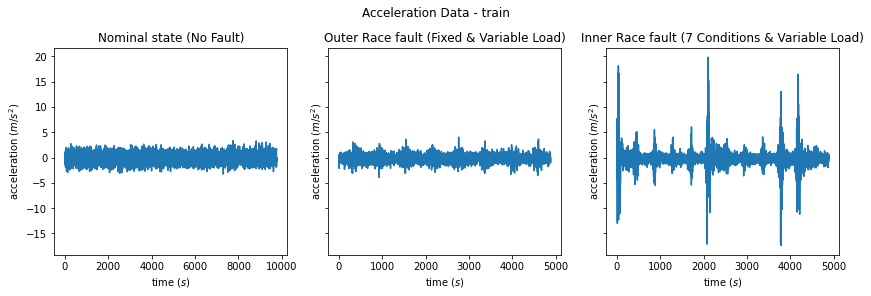

In [ ]:
rounded_psr_1 = int(psr_1/10)
range_of_samples = range(0, rounded_psr_1)
rounded_psr_3 = int(psr_3/10)
range_of_samples_3 = range(0, rounded_psr_3)

fig, (plt1, plt2, plt3) = plt.subplots(1, 3, sharey = True, figsize=(12,4), constrained_layout=True)

plt1.set_xlabel("time $(s)$")
plt1.set_ylabel("acceleration $(m/s^2)$")
plt1.set_title('Nominal state (No Fault)')
plt1.plot(Nominal_data[range_of_samples])

plt2.set_xlabel("time $(s)$")
plt2.set_ylabel("acceleration $(m/s^2)$")
plt2.set_title('Outer Race fault (Fixed & Variable Load)')
plt2.plot(merged_G_OR_data[range_of_samples_3])

plt3.set_xlabel("time $(s)$")
plt3.set_ylabel("acceleration $(m/s^2)$")
plt3.set_title('Inner Race fault (7 Conditions & Variable Load)')
plt3.plot(IR_data[range_of_samples_3])

fig.suptitle('Acceleration Data - train')
fig.show()

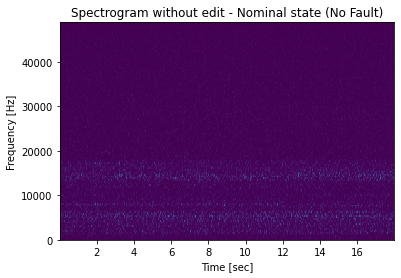

In [ ]:
#Unfiltered Spectrogram
from scipy import signal
f, t, Sxx = signal.spectrogram(merged_G_3BL_data, psr1)
#plt.plot(Sxx)
plt.pcolormesh(t, f, Sxx, shading='flat')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram without edit - Nominal state (No Fault)')
plt.show()

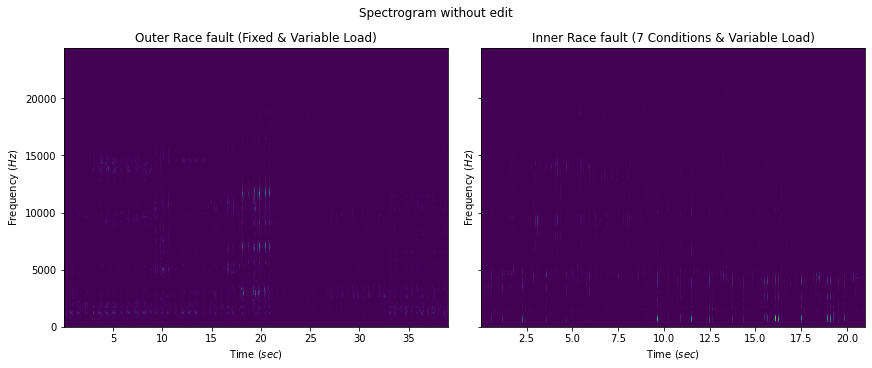

In [ ]:
#Unfiltered Spectrogram
from scipy import signal
fig, (plt1, plt2) = plt.subplots(1, 2, sharey = True, figsize=(12,5), constrained_layout=True)

plt1.set_xlabel("Time $(sec)$")
plt1.set_ylabel("Frequency $(Hz)$")
plt1.set_title('Outer Race fault (Fixed & Variable Load)')
f1, t1, Sxx1 = signal.spectrogram(merged_G_OR_data, psr3)
plt1.pcolormesh(t1, f1, Sxx1, shading='flat')

plt2.set_xlabel("Time $(sec)$")
plt2.set_ylabel("Frequency $(Hz)$")
plt2.set_title('Inner Race fault (7 Conditions & Variable Load)')
f2, t2, Sxx2 = signal.spectrogram(merged_G_IR_data, psr3)
plt2.pcolormesh(t2, f2, Sxx2, shading='flat')

fig.suptitle('Spectrogram without edit')
fig.show()

##Building the CNN 



###Data Chunking 
* Divide the signal in chunks of size chunk_size, and 
take a subset number_of_chunks from all the available for training and testing the CNN.
* A chunk is simply a sequential subset of the time series data with a fixed length - the chunk_size.
* Every chunk is distinct - no overlapping samples in different chunks.
* This method is tumbling time windowing
* Each time series is an array, and they have slight difference in length.
* If a chunk size is fixed to divide the file, 


a function is needed to split the data exaclty in number_of_chunks of chunk_size and get rid of the remaining part.

---

This is a better method since directly making an image from the dataset is inefficient. The entire dataset has many different points and it is very time consuming to upload all the points.

In [ ]:
def split_exact(x, n_chunks=2, axis=1):
    import numpy as np
    l = np.shape(x)[axis]
    x_split = x
    if l > n_chunks > 1:
        n = n_chunks
        if axis == 0:
            x_split = np.split(x[:-(l % n)], n, axis=axis)
        elif axis == 1:
            x_split = np.split(x[:, :-(l % n)], n, axis=axis)
    return x_split 

Function for loading g data in CHUNKS

In [ ]:
import numpy as np

def g_data_chunkSplit(gdata, chunk_size=128):
    """
    Change loaded mat files and splits it in chunks of size chunk_size
    """
    y_n: ndarray = np.array([])
    # signal
    x = gdata
    x = x / np.std(x)
    y_n = np.append(y_n, x)
    n_splits = len(y_n) // chunk_size
    y_n = split_exact(y_n, n_chunks=n_splits, axis=0)

    return y_n

Two chunk sizes and number of chunks as there are two different SR

In [ ]:
chunk_size_1 = rounded_psr_1
print("First rounded sampling rate", rounded_psr_1)
number_of_chunks_1 = chunk_size_1 + 200

chunk_size_2 = rounded_psr_3
print("Second rounded sampling rate", rounded_psr_3)
number_of_chunks_2 = chunk_size_2 + 200

nominal_data_chunk_train = g_data_chunkSplit(Nominal_data_train, chunk_size=chunk_size_1)
print("nominal_data_chunk_train", np.shape(nominal_data_chunk_train))
ir_data_chunk_train =  g_data_chunkSplit(IR_data_train, chunk_size=chunk_size_2)
print("ir_data_chunk_train", np.shape(ir_data_chunk_train)) 
or_data_chunk_train =  g_data_chunkSplit(OR_data_train, chunk_size=chunk_size_2)
print("or_data_chunk_train", np.shape(or_data_chunk_train)) 

#nominal_data_chunk_val = g_data_chunkSplit(Nominal_data_val, chunk_size=chunk_size_1)
#print(np.shape(nominal_data_chunk_val)) 
#or_data_chunk_val =  g_data_chunkSplit(OR_data_val, chunk_size=chunk_size_2)
#print(np.shape(or_data_chunk_val)) 
#ir_data_chunk_val =  g_data_chunkSplit(IR_data_val, chunk_size=chunk_size_2)
#print(np.shape(ir_data_chunk_val))

nominal_data_chunk_test = g_data_chunkSplit(Nominal_data_test, chunk_size=chunk_size_1)
print("nominal_data_chunk_test", np.shape(nominal_data_chunk_test)) 
ir_data_chunk_test =  g_data_chunkSplit(IR_data_test, chunk_size=chunk_size_2)
print("ir_data_chunk_test", np.shape(ir_data_chunk_test))
or_data_chunk_test =  g_data_chunkSplit(OR_data_test, chunk_size=chunk_size_2)
print("or_data_chunk_test", np.shape(or_data_chunk_test))

First rounded sampling rate 9765
Second rounded sampling rate 4882
nominal_data_chunk_train (18, 9765)
ir_data_chunk_train (21, 4882)
or_data_chunk_train (39, 4882)
nominal_data_chunk_test (162, 9765)
ir_data_chunk_test (189, 4882)
or_data_chunk_test (351, 4882)


###1. Feature Engineering
  
  i. A time/frequency image is extracted with three different preprocessing techniques. 
 
  ii. For all the images a min max normalization is used, to have mapping only in the range [0,1].

In [ ]:
def min_max_norm(ary):
    ary = (ary - ary.min()) / np.abs(ary.max() - ary.min())
    return ary

###2. Short Time Fourier Transform

The function generate_spectrogram_image(data_y_vector, image_shape) takes 

  (i) a time series as input and 
  
  (ii) the resolution of the image that it will generate and 
  
  (iii) returns the Short time Fourier normalized in the range [0,1].

In [ ]:
from scipy import signal
from skimage.transform import resize

def generate_spectrogram_image(data_y_vector, image_shape, fs):
    """
    Calculate the spectrogram of an array data_y_vector and resize it in 
    the image_shape resolution
    """
    data_y_vector_len = np.shape(data_y_vector)
    #display(data_y_vector_len)

    f, t, sxx = signal.spectrogram(
        data_y_vector,
        fs)

    sxx = min_max_norm(sxx)
    #Reshape to resolution
    sxx = resize(sxx, image_shape, mode='constant', anti_aliasing=True)

    return sxx

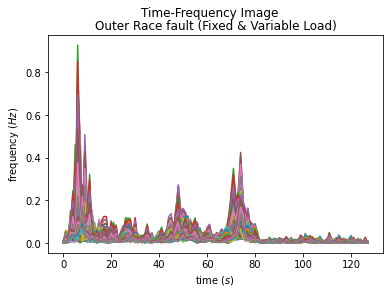

In [ ]:
#Test - higher resolution
plt.xlabel("time $(s)$")
plt.ylabel("frequency $(Hz)$")
plt.title('Outer Race fault (Fixed & Variable Load)')
plt.plot(generate_spectrogram_image(or_data_chunk_train[1], (128, 128), psr_3))
plt.suptitle('Time-Frequency Image')
plt.show()

A look at the Short Time Fourier Transform of a chunk of the data Nominal, Fixed & Variable Load OR and IR:

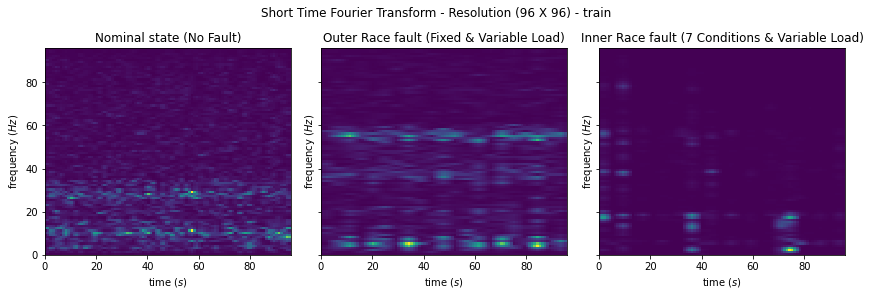

In [ ]:
fig, (plt1, plt2, plt3) = plt.subplots(1, 3, sharey = True, figsize=(12,4), constrained_layout=True)

plt1.set_xlabel("time $(s)$")
plt1.set_ylabel("frequency $(Hz)$")
plt1.set_title('Nominal state (No Fault)')
plt1.pcolormesh(generate_spectrogram_image(nominal_data_chunk_train[1], (96, 96), psr_1), shading='flat')

plt2.set_xlabel("time $(s)$")
plt2.set_ylabel("frequency $(Hz)$")
plt2.set_title('Outer Race fault (Fixed & Variable Load)')
plt2.pcolormesh(generate_spectrogram_image(or_data_chunk_train[1], (96, 96), psr_3), shading='flat')

plt3.set_xlabel("time $(s)$")
plt3.set_ylabel("frequency $(Hz)$")
plt3.set_title('Inner Race fault (7 Conditions & Variable Load)')
plt3.pcolormesh(generate_spectrogram_image(ir_data_chunk_train[1], (96, 96), psr_3), shading='flat')

fig.suptitle('Short Time Fourier Transform - Resolution (96 X 96) - train')
fig.show()

###4. Data shuffling
  * Create several images to use to train the CNN.
  * Some functions needed to help in creating the folders in which the images will be stored, and to label correctly the file generated, depending on the parameters chosen, such as number_of_chunks, chunk_size, image_shape in dpi.
  * A random shuffling implemented between the chunks at this stage, to avoid that the CNN is trained on images that are representative of adjacent time windows.


In [ ]:
def try_make_directories():     
    data_directories = ["npy_dataset"]
    for directory in data_directories:
        try:
            os.makedirs(f'./{directory}')
        except OSError as e:
            if e.errno != errno.EEXIST:
                raise

####TRANSFER LEARNING

Separating creating image for either - 
"train" or "test" with data_type variable



In [ ]:
from tqdm.notebook import tqdm
from enum import Enum
#
def create_image_by_label_database(
        data_type,
        image_types,
        image_shape,
        noise_scale = 0.0,
        shuffle_across_time=True,
        overwrite_existing_file=False):

    try_make_directories()

    filename_for_images_by_labels = npy_dataset_filename(
        data_type,
        image_types,
        image_shape,
        noise_scale, 
        shuffle_across_time
    )

    if overwrite_existing_file is False:
        import os
        if os.path.isfile(filename_for_images_by_labels):
            print(
                "File already exists. Use 'overwrite_existing_file' if you wish to regenerate and overwrite it. Bye.")
            return
#   
    if data_type == "train":
      len_n = np.shape(nominal_data_chunk_train)[0]
      len_ir = np.shape(ir_data_chunk_train)[0]
      len_or = np.shape(or_data_chunk_train)[0]
      len_data = min(len_n, len_or, len_ir, number_of_chunks_1, number_of_chunks_2)
      #display(len_n, len_or, len_ir)
      # add some noise 
      #nominal_data = [x + y for x, y in zip(nominal_data_chunk_train, [np.random.normal(0, noise_scale, chunk_size_1) for i in range(len_n)])]
      #or_data = [x + y for x, y in zip(or_data_chunk_train, [np.random.normal(0, noise_scale, chunk_size_2) for i in range(len_or)])]
      #ir_data = [x + y for x, y in zip(ir_data_chunk_train, [np.random.normal(0, noise_scale, chunk_size_2) for i in range(len_ir)])]
      nominal_data = nominal_data_chunk_train
      ir_data = ir_data_chunk_train
      or_data = or_data_chunk_train
      
    elif data_type == "validation":
      len_n = np.shape(nominal_data_chunk_val)[0]
      len_ir = np.shape(ir_data_chunk_val)[0]
      len_or = np.shape(or_data_chunk_val)[0]
      len_data = min(len_n, len_or, len_ir, number_of_chunks_1, number_of_chunks_2)
      #display(len_n, len_or, len_ir)
      # add some noise 
      #nominal_data = [x + y for x, y in zip(nominal_data_chunk_test, [np.random.normal(0, noise_scale, chunk_size_1) for i in range(len_n)])]
      #or_data = [x + y for x, y in zip(or_data_chunk_test, [np.random.normal(0, noise_scale, chunk_size_2) for i in range(len_or)])]
      #ir_data = [x + y for x, y in zip(ir_data_chunk_test, [np.random.normal(0, noise_scale, chunk_size_2) for i in range(len_ir)])]
      nominal_data = nominal_data_chunk_val
      ir_data = ir_data_chunk_val
      or_data = or_data_chunk_val

    elif data_type == "test":
      len_n = np.shape(nominal_data_chunk_test)[0]
      len_ir = np.shape(ir_data_chunk_test)[0]
      len_or = np.shape(or_data_chunk_test)[0]
      len_data = min(len_n, len_or, len_ir, number_of_chunks_1, number_of_chunks_2)
      #display(len_n, len_or, len_ir)
      # add some noise 
      #nominal_data = [x + y for x, y in zip(nominal_data_chunk_test, [np.random.normal(0, noise_scale, chunk_size_1) for i in range(len_n)])]
      #or_data = [x + y for x, y in zip(or_data_chunk_test, [np.random.normal(0, noise_scale, chunk_size_2) for i in range(len_or)])]
      #ir_data = [x + y for x, y in zip(ir_data_chunk_test, [np.random.normal(0, noise_scale, chunk_size_2) for i in range(len_ir)])]
      nominal_data = nominal_data_chunk_test
      ir_data = ir_data_chunk_test
      or_data = or_data_chunk_test
    
    if shuffle_across_time:
        # so the first N chunks will be taken at random time from the whole time window
        np.random.shuffle(nominal_data)
        np.random.shuffle(ir_data)
        np.random.shuffle(or_data)
        
    images_by_labels = {'n': [], 'ir': [], 'or': []}
    #display(int(len_data))
    for i in tqdm(range(int(len_n))):
        #display(len(nominal_data), nominal_data[i].shape)
        n_images = generate_rgba_images_from_data(nominal_data[i], image_shape, image_types, psr_1)

        images_by_labels['n'].extend(n_images)

    for i in tqdm(range(int(len_ir))):
        #display(len(nominal_data), nominal_data[i].shape)
        ir_images = generate_rgba_images_from_data(ir_data[i], image_shape, image_types, psr_3)      

        images_by_labels['ir'].extend(ir_images)
        
    for i in tqdm(range(int(len_or))):
        #display(len(nominal_data), nominal_data[i].shape)
        or_images = generate_rgba_images_from_data(or_data[i], image_shape, image_types, psr_3)  

        images_by_labels['or'].extend(or_images)

    print(f'Saving {filename_for_images_by_labels}')
    np.save(f'{filename_for_images_by_labels}', images_by_labels)
        
#
def npy_dataset_filename(
        data_type,
        image_types,
        image_shape,
        noise_scale,
        shuffled_across_time):
    filename_suffix = \
        (f'_data_{data_type}') + \
        f'_types{"-".join([str(t)[10:12] for t in image_types])}' + \
        (f'_noise{noise_scale}' if noise_scale > 0 else '') + \
        (f'_timeshuffled' if shuffled_across_time else '') + \
        f'_shape{image_shape[0]}-{image_shape[1]}'
    filename = f'./npy_dataset/images_by_labels_for_cnn{filename_suffix}.npy'
    return filename
#
#
def generate_rgba_images_from_data(
        vector_y_data,
        image_shape,
        image_types, fs2):
    images = []
    if ImageType.SPECTROGRAM in image_types:
        images.append(generate_spectrogram_image(vector_y_data, image_shape, fs2))

    images_rgba = ary_to_rgba(images)

    return images_rgba
#
#
def ary_to_rgba(ary, nchannels=1):
    from matplotlib import cm

    ary_dim = (np.shape(ary))

    im = np.empty(shape=(ary_dim[0], ary_dim[1], ary_dim[2], nchannels)).astype('uint8')
    for i in np.arange(0, len(ary)):
        im[i, :] = np.log(ary[i] + 1e-6).reshape(ary_dim[0], ary_dim[1], ary_dim[2], nchannels)
    return im
#

class ImageType(Enum):
    SCALOGRAM = 1
    SPECTROGRAM = 2
    QTRANSFORM = 3

Added noise "noise_scale = 0.0" for std deviation of 0.0 or not

In [ ]:
create_image_by_label_database(
    data_type = "train",
    image_types=[ImageType.SPECTROGRAM], 
    image_shape=(96, 96),
    noise_scale = 0.0,
    shuffle_across_time=True,
    overwrite_existing_file=True)


Saving ./npy_dataset/images_by_labels_for_cnn_data_train_typesSP_timeshuffled_shape96-96.npy


In [ ]:
create_image_by_label_database(
    data_type = "validation",
    image_types=[ImageType.SPECTROGRAM], 
    image_shape=(96, 96),
    noise_scale = 0.0,
    shuffle_across_time=True,
    overwrite_existing_file=True)

In [ ]:
create_image_by_label_database(
    data_type = "test",
    image_types=[ImageType.SPECTROGRAM], 
    image_shape=(96, 96),
    noise_scale = 0.0,
    shuffle_across_time=True,
    overwrite_existing_file=True)


Saving ./npy_dataset/images_by_labels_for_cnn_data_test_typesSP_timeshuffled_shape96-96.npy


##CNN

###1. Preparing data Train and Test (Transfer Learning)

  A function that loads the images generated. Parameters repeated here for the file generation.

Train Image for datatype = "train" and Test Image for datatype = "test" 

In [ ]:
def load_images_by_labels_by_params(
        data_type,
        image_types,
        image_shape,
        noise_scale = 0.0,
        shuffled_across_time=True):
    filename = npy_dataset_filename(
        data_type,
        image_types,
        image_shape,
        noise_scale,
        shuffled_across_time)

    loaded = np.load(filename, allow_pickle=True)
    print(f"Successfully loaded file {filename}")
    return loaded.item()  # item() gets the actual dictionary from the loaded object

Images loaded with the aid of the previous Function

In [ ]:
data_type = "train"
image_types=[ImageType.SPECTROGRAM]
image_shape = (96, 96)
noise_scale = 0.0
shuffle_across_time=True

images_by_labels_for_cnn_train = load_images_by_labels_by_params(
    data_type=data_type,
    image_types=image_types, 
    image_shape=image_shape,
    noise_scale = noise_scale,
    shuffled_across_time = shuffle_across_time)

Successfully loaded file ./npy_dataset/images_by_labels_for_cnn_data_train_typesSP_timeshuffled_shape96-96.npy


In [ ]:
print(images_by_labels_for_cnn_train.keys())
display(np.shape(images_by_labels_for_cnn_train['n']))
display(np.shape(images_by_labels_for_cnn_train['ir']))
display(np.shape(images_by_labels_for_cnn_train['or']))

dict_keys(['n', 'ir', 'or'])


(18, 96, 96, 1)

(21, 96, 96, 1)

(39, 96, 96, 1)

In [ ]:
data_type = "validation"
image_types=[ImageType.SPECTROGRAM]
image_shape = (96, 96)
noise_scale = 0.0
shuffle_across_time=True

images_by_labels_for_cnn_val = load_images_by_labels_by_params(
    data_type=data_type,
    image_types=image_types, 
    image_shape=image_shape,
    noise_scale = noise_scale,
    shuffled_across_time = shuffle_across_time)

In [ ]:
print(images_by_labels_for_cnn_val.keys())
display(np.shape(images_by_labels_for_cnn_val['n']))
display(np.shape(images_by_labels_for_cnn_val['or']))
display(np.shape(images_by_labels_for_cnn_val['ir']))

In [ ]:
data_type = "test"
image_types=[ImageType.SPECTROGRAM]
image_shape = (96, 96)
noise_scale = 0.0
shuffle_across_time=True

images_by_labels_for_cnn_test = load_images_by_labels_by_params(
    data_type=data_type,
    image_types=image_types, 
    image_shape=image_shape,
    noise_scale = noise_scale,
    shuffled_across_time = shuffle_across_time)

Successfully loaded file ./npy_dataset/images_by_labels_for_cnn_data_test_typesSP_timeshuffled_shape96-96.npy


In [ ]:
print(images_by_labels_for_cnn_test.keys())
display(np.shape(images_by_labels_for_cnn_test['n']))
display(np.shape(images_by_labels_for_cnn_test['ir']))
display(np.shape(images_by_labels_for_cnn_test['or']))

dict_keys(['n', 'ir', 'or'])


(162, 96, 96, 1)

(189, 96, 96, 1)

(351, 96, 96, 1)

###2. Transform the data to a suitable form for feeding to the CNN:

  (i) separate the images and their labels into two arrays, correlated by their indexes

  (ii) have the labels one-hot encoded (i.e. label "N" becomes (0,0,1))

  (iii) Additionally, to get a good distribution of data types accross the training and test data, interleave the three types of data, that is to get a single array, containing all the images, where sequential images are always having a different data type (N, OR, or IR) in the form [ ..., "N", "OR", "IR", "N", "OR", "IR", ...]. 

  (iv) This is implemented in the function separate_images_from_labels:

In [ ]:
def separate_images_from_labels(images_by_labels, interleave: bool):
    all_labels = list(images_by_labels.keys())
    NB_CLASSES = len(all_labels)
    all_labels_onehot = np.identity(NB_CLASSES).astype('uint8')
    label_to_onehot_mapper = {all_labels[i]: all_labels_onehot[i] for i in np.arange(NB_CLASSES)}

    all_images_for_cnn = []
    all_labels_for_cnn_onehot = []

    for key in all_labels:
        images = images_by_labels[key]
        labels_onehot = np.full(shape=(len(images), NB_CLASSES), fill_value=label_to_onehot_mapper[key])

        all_images_for_cnn.append(images)
        all_labels_for_cnn_onehot.append(labels_onehot)

    if interleave:
        all_images_for_cnn = lists_interleave(all_images_for_cnn)
        all_labels_for_cnn_onehot = lists_interleave(all_labels_for_cnn_onehot)
    else:  # flatten the lists
        all_images_for_cnn = [image for sublist in all_images_for_cnn for image in sublist]
        all_labels_for_cnn_onehot = [label for sublist in all_labels_for_cnn_onehot for label in sublist]

    return np.array(all_images_for_cnn), np.array(all_labels_for_cnn_onehot)
#Faulty flawed DO NOT USE THIS FUNCTION!!!                               
def lists_interleave(lists):
    return [val for tup in zip(*lists) for val in tup]

1. separate images for training set and testing set as per transfer learning

2. Validation split is done below

In [ ]:
images_train, labels_train_onehot = separate_images_from_labels(images_by_labels_for_cnn_train, interleave=False)
#images_val, labels_val_onehot = separate_images_from_labels(images_by_labels_for_cnn_val, interleave=True)
images_test, labels_test_onehot = separate_images_from_labels(images_by_labels_for_cnn_test, interleave=False)
#display(labels_for_cnn_onehot)
display(type(labels_train_onehot))
print("images_train", images_train.shape)
print("labels_train_onehot", labels_train_onehot.shape)
print("images_test", images_test.shape)
print("labels_test_onehot", labels_test_onehot.shape)
#display(images_val.shape)

numpy.ndarray

images_train (78, 96, 96, 1)
labels_train_onehot (78, 3)
images_test (702, 96, 96, 1)
labels_test_onehot (702, 3)


Lists Interleave does not work so random shuffle while keeping the labels for values intact

In [ ]:
random_idx = np.random.permutation(np.arange(0,images_train.shape[0]))
random_idx_test = np.random.permutation(np.arange(0,images_test.shape[0]))

In [ ]:
images_train = images_train[random_idx]
labels_train_onehot = labels_train_onehot[random_idx]
images_test = images_test[random_idx_test]
labels_test_onehot = labels_test_onehot[random_idx_test]

###3. CNN model with Keras

  (a) The problem - a supervised classification problem, with 3 classes. Convolutional Neural Networks implemented as Sequential Keras model. Here Keras exploits TensorFlow as backend for the tensor arithmetics.

  (b) The images that previously generated form a tuple (number of images, x dpi, y dpi, number of channels). 
  
  (c) Categorical cross-entropy loss function and ADAM optimizer and Leaky RELU activation function. 
  
  (d) The learning rate has been found by using cyclical learning rate algorithm of Smith. An implementation of the algorithm by Keras callback is in the ./colab folder.

In [ ]:
from keras import optimizers

## input data parameters
IMAGES_SHAPE = (96, 96, 1)
#4 input channels
PADDING = 'same'
KERNEL_SIZE = (3, 3)
KERNEL_INITIALIZER = 'glorot_normal'
# parameters for deep layers
NUMBER_OF_CLASSES = 3  # "N", "IR", "OR"
DROPOUT = 0.4
LEAK_ALPHA = 0.1  #slope for leaky relu
MAX_POOLING_POOL_SIZE = (2, 2)
ACTIVATION_LAYER_FUNCTION = 'softmax'
# loss and optimizer
LOSS_FUNCTION = 'categorical_crossentropy'
LEARNING_RATE = 0.001  #Learning rate which is default
OPTIMIZER = optimizers.Adam(epsilon=10e-6)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
from keras import metrics


# CNN architecture from Guo et al.
model = Sequential()
model.add(Conv2D(32, KERNEL_SIZE,                  
                 input_shape=IMAGES_SHAPE,
                 data_format='channels_last',
                 kernel_initializer=KERNEL_INITIALIZER,                 
                 padding=PADDING))
model.add(LeakyReLU(LEAK_ALPHA))
#model.add(Conv2D(32, KERNEL_SIZE, 
                 #kernel_initializer=KERNEL_INITIALIZER,
                 #padding=PADDING))
#model.add(LeakyReLU(LEAK_ALPHA))
model.add(MaxPooling2D(pool_size=MAX_POOLING_POOL_SIZE))
model.add(Conv2D(64, KERNEL_SIZE, 
                 kernel_initializer=KERNEL_INITIALIZER,
                 padding=PADDING))
model.add(LeakyReLU(LEAK_ALPHA))
#model.add(Conv2D(64, KERNEL_SIZE, 
                 #kernel_initializer=KERNEL_INITIALIZER,
                 #padding=PADDING))
#model.add(LeakyReLU(LEAK_ALPHA))
model.add(MaxPooling2D(pool_size=MAX_POOLING_POOL_SIZE))
model.add(Conv2D(128, KERNEL_SIZE, 
                 kernel_initializer=KERNEL_INITIALIZER,
                 padding=PADDING))
model.add(LeakyReLU(LEAK_ALPHA))
#model.add(Conv2D(128, KERNEL_SIZE, 
                 #kernel_initializer=KERNEL_INITIALIZER,
                 #padding=PADDING))
#model.add(LeakyReLU(LEAK_ALPHA))
model.add(MaxPooling2D(pool_size=MAX_POOLING_POOL_SIZE))
model.add(Flatten())
model.add(Dense(256))#256
model.add(LeakyReLU(LEAK_ALPHA))
model.add(Dropout(DROPOUT))#added dropout
model.add(Dense(128))#128
model.add(LeakyReLU(LEAK_ALPHA))
model.add(Dropout(DROPOUT))#added dropout
model.add(Dense(NUMBER_OF_CLASSES))
model.add(Activation(ACTIVATION_LAYER_FUNCTION))


model.compile(loss=LOSS_FUNCTION, 
              optimizer=OPTIMIZER,
              metrics=[metrics.categorical_accuracy])  
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 128)      

##4. Training the CNN

Train the CNN with a validation split of 1/4 of the image batch size and over 10 epochs. The CNN will be then tested on the hold-out data.

In [ ]:
BATCH_SIZE = 64
NUMBER_OF_EPOCHS = 50

history = model.fit(
    images_train, labels_train_onehot,
    batch_size=BATCH_SIZE,
    epochs=NUMBER_OF_EPOCHS, 
    validation_data=(images_test, labels_test_onehot), 
    verbose=1)

Epoch 1/50
2/2 [==============================] - 0s 171ms/step - loss: 1.0423e-06 - categorical_accuracy: 1.0000 - val_loss: 11.5846 - val_categorical_accuracy: 0.6781
Epoch 2/50
2/2 [==============================] - 0s 134ms/step - loss: 0.0143 - categorical_accuracy: 0.9872 - val_loss: 12.2555 - val_categorical_accuracy: 0.6752
Epoch 3/50
2/2 [==============================] - 0s 125ms/step - loss: 1.0209e-06 - categorical_accuracy: 1.0000 - val_loss: 12.8408 - val_categorical_accuracy: 0.6752
Epoch 4/50
2/2 [==============================] - 0s 134ms/step - loss: 0.0097 - categorical_accuracy: 0.9872 - val_loss: 13.3825 - val_categorical_accuracy: 0.6724
Epoch 5/50
2/2 [==============================] - 0s 127ms/step - loss: 5.3643e-07 - categorical_accuracy: 1.0000 - val_loss: 13.8571 - val_categorical_accuracy: 0.6695
Epoch 6/50
2/2 [==============================] - 0s 126ms/step - loss: 2.2925e-08 - categorical_accuracy: 1.0000 - val_loss: 14.2565 - val_categorical_accuracy: 0

##5. Test the CNN

Once the model has been fitted, its precision is assessed through a classical one vs many confusion matrix.

In [ ]:
#labels_predicted = history.model.predict_classes(images_test, verbose=1)
labels_predicted = np.argmax(history.model.predict(images_test), axis=-1)

In [ ]:
# for the confusion matrix we need a factorized labels 
# [1,0,0] -> 0 ("N")
# [0,1,0] -> 1 ("IR") 
# [0,0,1] -> 2 ("OR")

labels_test_factorized = [(1*label[0]+2*label[1]+3*label[2])-1 for label in labels_test_onehot]
#display(labels_test_factorized)
from sklearn.metrics import classification_report
print(classification_report(labels_test_factorized, labels_predicted, zero_division=0))

              precision    recall  f1-score   support

           0       0.46      0.86      0.60       162
           1       0.86      0.81      0.84       189
           2       0.78      0.49      0.60       351

    accuracy                           0.66       702
   macro avg       0.70      0.72      0.68       702
weighted avg       0.73      0.66      0.67       702



## 6. Train and Test loss and accuracy
Validation here is part of the test data.

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


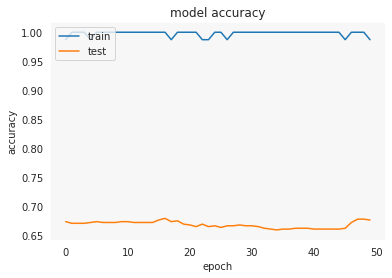

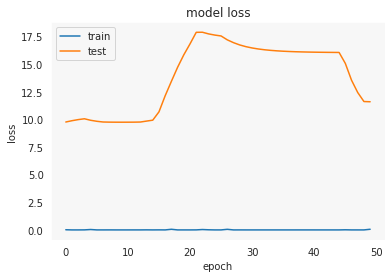

In [ ]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##7. ROC analysis

The ROC curves for each class give a complete picture of the classification performance of the CNN. It is convenient to write a function that takes this task.

In [ ]:
def ROC(model, X_test, y_test, n_class):
    import seaborn as sns
    from sklearn.metrics import roc_curve, roc_auc_score, auc
    from sklearn.metrics import confusion_matrix, classification_report
    from sklearn.metrics import accuracy_score, balanced_accuracy_score
    from sklearn.preprocessing import label_binarize
    from itertools import cycle
    import matplotlib.pyplot as plt
    
    
    sns.set_style("dark",{"axes.facecolor": ".97"})
    # Predict the labels of the test set: y_pred
    #y_pred = model.predict_classes(X_test)
    y_pred = np.argmax(model.predict(X_test), axis=-1)

    # Compute predicted probabilities: y_pred_prob
    #y_pred_prob = model.predict_proba(X_test)
    y_pred_prob = model.predict(X_test)
    y_test_binary = label_binarize(y_test, classes=range(0, n_class))

    y_test_normal = y_test_binary[:, 0]
    y_prob_normal = y_pred_prob[:, 0]

    y_test_inner_race = y_test_binary[:, 1]
    y_prob_inner_race = y_pred_prob[:, 1]

    y_test_outer_race = y_test_binary[:, 2]
    y_prob_outer_race = y_pred_prob[:, 2]
    
    lw = 1.5
    
    # Compute and print the confusion matrix and classification report
    matrix_c = confusion_matrix(y_test, y_pred)
    category_labels = ['N','IR','OR']

    matrix = pd.DataFrame(matrix_c)
    plt.figure()
    sns.heatmap(matrix, annot= True, fmt = "d",
           xticklabels = category_labels,
           yticklabels = category_labels, cmap = "Blues", cbar = False)
    plt.xticks(rotation = 90)
    plt.show()

    # Compute accuracy score
    print("accuracy score: ", accuracy_score(y_test, y_pred))
    print("Number of correctly Classified Samples: ", accuracy_score(y_test, y_pred, normalize=False))
    print("balanced accuracy score: ", balanced_accuracy_score(y_test, y_pred))


    # Compute ROC curve and ROC area for each class

    fpr = dict()
    tpr = dict()
    thresholds = dict()
    roc_auc = dict()

    fpr[0], tpr[0], thresholds[0] = roc_curve(y_test_normal, y_prob_normal)
    fpr[1], tpr[1], thresholds[1] = roc_curve(y_test_inner_race, y_prob_inner_race)
    fpr[2], tpr[2], thresholds[2] = roc_curve(y_test_outer_race, y_prob_outer_race)

    for i in range(3):
      roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(4, 4), dpi=150)

    colors = cycle(['black', 'blue', 'red'])
    for i, color in zip(range(3), colors):
        plot_label=['N','IR','OR']  # "N", "IR", "OR"
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                       ''.format(plot_label[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=.7)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right", prop={'size': 8})
    plt.show()



### The curves

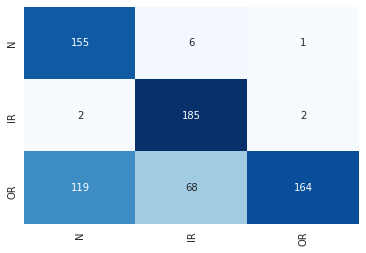

accuracy score:  0.717948717948718
Number of correctly Classified Samples:  504
balanced accuracy score:  0.8009541898430786


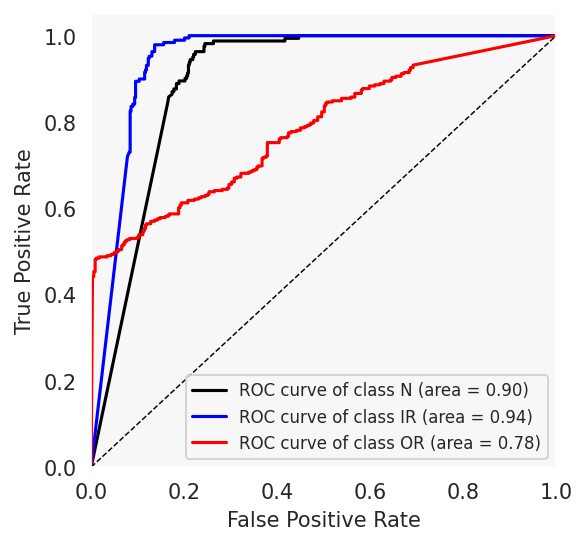

In [ ]:
ROC(history.model, images_test, labels_test_factorized, 3)